# Kernels for hand-made SVM

**In this homework we will again look at SVM kernels and will write and test rbf kernel for our own implementation.**

In [1]:
'''
If you are using Google Colab, uncomment the next line to download `svm.py`
You can open and change downloaded `.py` files in Colab using the "Files" sidebar on the left.
'''
# !wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks/assignment0_03_svm/svm.py 

'\nIf you are using Google Colab, uncomment the next line to download `svm.py`\nYou can open and change downloaded `.py` files in Colab using the "Files" sidebar on the left.\n'

In [2]:
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()
import numpy as np
from sklearn.metrics import accuracy_score

In [3]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for our SVM class"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 50)
    y = np.linspace(ylim[0], ylim[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.predict(xy).reshape(X.shape)
    # plot decision boundary and margins
    CS = ax.contourf(X, Y, P, origin='lower', cmap='autumn', alpha=0.1)
    plt.colorbar(CS, ax=ax, shrink=0.8, extend='both')
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [7]:
from sklearn.datasets import make_circles

from sklearn.svm import SVC # "Support vector classifier"

X, y = make_circles(150, factor=.1, noise=.1, random_state=42)

X_test, y_test = X[100:], y[100:]
X, y = X[:100], y[:100]
X

array([[ 9.32554392e-01, -3.16274134e-01],
       [-1.61353133e-02,  1.07239786e+00],
       [-1.10787318e-01, -8.71503973e-02],
       [ 1.47003149e-01,  1.40687654e-01],
       [ 1.25360973e-01,  3.98190739e-02],
       [-7.18178047e-01,  5.35582339e-01],
       [ 5.73670260e-01, -7.29217368e-01],
       [ 4.72338445e-02, -1.05237283e-01],
       [ 9.60294603e-01, -5.82586816e-01],
       [-1.82225481e-01,  8.98909493e-02],
       [-1.37366405e-01, -8.12251657e-03],
       [ 5.81120428e-01,  8.27721835e-01],
       [-9.70620818e-01, -7.68982598e-02],
       [ 6.34662947e-01,  8.24942980e-01],
       [-2.27975003e-02,  8.32430221e-01],
       [-1.28195603e-01, -1.09903930e+00],
       [-6.54647373e-02,  2.20811323e-02],
       [ 8.10388450e-01, -4.81359944e-01],
       [-5.67530533e-02, -1.02042476e+00],
       [-5.11918688e-02, -1.41952495e-01],
       [-7.23012959e-01,  6.52682589e-01],
       [ 4.18724791e-02, -2.08707457e-01],
       [-6.48247178e-01,  8.98463295e-01],
       [-1.

### Sklearn realization:

Test accuracy:  0.64


C:\Users\Windows\AppData\Local\Temp/ipykernel_2076/4205391530.py:15: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(CS, ax=ax, shrink=0.8, extend='both')


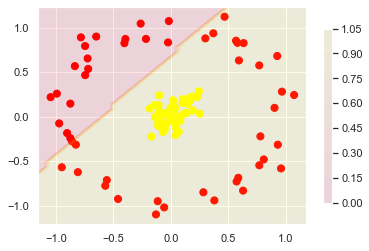

In [5]:
clf = SVC(kernel='linear').fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Test accuracy:  1.0


C:\Users\Windows\AppData\Local\Temp/ipykernel_2076/4205391530.py:15: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(CS, ax=ax, shrink=0.8, extend='both')


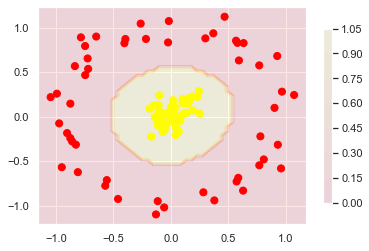

In [6]:
clf = SVC(kernel='rbf').fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

## Let's look at our realization

### You need to open svm.py file and add all missed lines.

Linear SVM __primal__ optimization problem can be formulated as

$$ \frac{1}{n} \sum_{i=1}^n \max(0, 1 - y_i (w X_i - b)) + \lambda ||w||_2 \to \min_w $$

This problem can be solved with gradient or sub-gradien methods.

-----
Whereas __dual__ optimization problem formulates as follows:

$$
\sum_{i=1}^n c_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i c_i (X_i \cdot X_j ) y_j c_j \to \max_{c_1,...,c_n} \\ \text{subject to} \\
\sum_{i=1}^n c_iy_i=0 \\
0 \leq c_i \leq \frac{1}{2n\lambda} \forall i
$$

Where $W = \sum_{i=1}^n c_i y_i X_i$.

In this quadratic optimization problem we can use kernel trick: <br/>
introduce fucntion $K(X_i, X_j) = \phi (X_i) \phi (X_j)$ and change dot products in our optimization problem

Then we have 

$$
\sum_{i=1}^n c_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i c_i K(X_i, X_j) y_j c_j \to \max_{c_1,...,c_n} \\
\text{subject to} \\
\sum_{i=1}^n c_iy_i=0 \\
0 \leq c_i \leq \frac{1}{2n\lambda} \forall i
$$

$W = \sum_{i=1}^n c_i y_i \phi(X_i)$

In quadratic programming we can straightforwardly add kernel function, but it is not that simple, if we want to use gradient algorithms.

----
However primal optimization problem with kernels can be formulated like (see [Olivier Chapelle, 2006](https://www.cs.utah.edu/~piyush/teaching/svm-solving-primal.pdf)):

$$f(x) = \sum_{i=1}^n \beta_i K(x_i, x)$$

$$K: K_{i,j} = K(x_i, x_j)$$

$$ \lambda \vec{\beta^T} K \vec{\beta} + \sum_{i=1}^n L(y_i, K_i^T \vec{\beta}) \to \min_{\vec{\beta}}$$

where L is Hinge loss: $L(y_i, K_i^T \vec{\beta}) = \max(0, 1 - y_i (K_i^T \vec{\beta}))$

#### Radial basis function kernel.

####  The RBF kernel on two samples x and x', represented as feature vectors in some input space, is defined as:

## $K(x,x') = \exp \big{[}- \frac{||x-x'||^2}{2 \sigma^2} \big{]}.$

### Let's look how it works:

In [17]:
from svm import SVM, rbf

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
y[y==0] = -1 # for convenience with formulas
y_test[y_test==0] = -1

Epoch 0, Loss: 0.26777599155902865
Epoch 1, Loss: 0.31384106874465945
Epoch 2, Loss: 0.26111906170845034
Test accuracy:  0.5


C:\Users\Windows\AppData\Local\Temp/ipykernel_2076/4205391530.py:15: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(CS, ax=ax, shrink=0.8, extend='both')


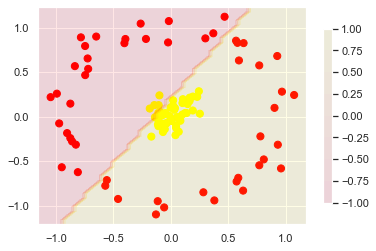

In [22]:
clf = SVM(epochs=3, lr=1, batch_size=20, verbose=True)
clf.fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Epoch 0, Loss: 0.37980084419250487
Epoch 1, Loss: 0.34782188534736636
Epoch 2, Loss: 0.5635987550020218
Epoch 3, Loss: 0.504279375076294
Epoch 4, Loss: 0.45446007549762724
Epoch 5, Loss: 0.33211791813373565
Epoch 6, Loss: 0.39668951481580733
Epoch 7, Loss: 0.44431919753551485
Epoch 8, Loss: 0.21636349707841873
Epoch 9, Loss: 0.26650427281856537
Epoch 10, Loss: 0.32950795292854307
Epoch 11, Loss: 0.4307739496231079
Epoch 12, Loss: 0.3035551905632019
Epoch 13, Loss: 0.22710084170103073
Epoch 14, Loss: 0.34494527280330656
Epoch 15, Loss: 0.23430381417274476
Epoch 16, Loss: 0.3026913348585367
Epoch 17, Loss: 0.18214663565158845
Epoch 18, Loss: 0.23590624183416367
Epoch 19, Loss: 0.2582655996084213
Epoch 20, Loss: 0.26998415440320966
Epoch 21, Loss: 0.2301521435379982
Epoch 22, Loss: 0.16142218858003615
Epoch 23, Loss: 0.24210909903049468
Epoch 24, Loss: 0.2353855088353157
Epoch 25, Loss: 0.19337846459820868
Epoch 26, Loss: 0.15258158147335052
Epoch 27, Loss: 0.10555376770207658
Epoch 28, L

C:\Users\Windows\AppData\Local\Temp/ipykernel_2076/4205391530.py:15: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(CS, ax=ax, shrink=0.8, extend='both')


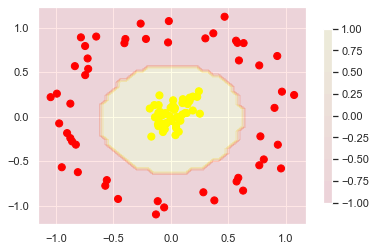

In [36]:
clf = SVM(epochs=40, lr=0.1, batch_size=20, verbose=True, kernel_function=rbf)
clf.fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [26]:
assert accuracy_score(y_test, pred) > 0.95

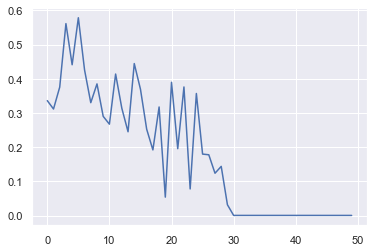

In [32]:
plt.plot(clf.epoch_loss)

## Our model with rbf kernel can learn this dataset too.